<a href="https://colab.research.google.com/github/tvelagapudi/deblender/blob/master/lenstronomy_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade https://github.com/sibirrer/lenstronomy/tarball/master
!pip install --upgrade https://github.com/sibirrer/fastell4py/tarball/master
!pip install CosmoHammer
!pip install astropy
!pip install dynesty
!pip install pymultinest
!pip install pypolychord
!pip install nestcheck
!pip install corner
!pip install aplpy

from lenstronomy.LensModel.lens_model import LensModel
import lenstronomy.Util.param_util as param_util
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.PointSource.point_source import PointSource
from lenstronomy.Data.pixel_grid import PixelGrid
from lenstronomy.ImSim.image_model import ImageModel
from lenstronomy.Data.imaging_data import ImageData
from lenstronomy.ImSim.image_linear_solve import ImageLinearFit
import lenstronomy.Util.image_util as image_util
from lenstronomy.Plots.output_plots import ModelPlot
from lenstronomy.Data.psf import PSF
import copy
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
%matplotlib inline

     | 9.1MB 2.3MB/s
  Created wheel for lenstronomy: filename=lenstronomy-1.0.1-cp36-none-any.whl size=5964256 sha256=ffd9fcae8a115af447d5404935302a1f90ad4b7b1dfe154bc573906d50b12bf8
  Stored in directory: /tmp/pip-ephem-wheel-cache-76r5dd02/wheels/2e/10/78/35e130916344104a501432d1042633eea6c63f71cf31abcace
Successfully built lenstronomy
     - 174kB 1.4MB/s
  Created wheel for fastell4py: filename=fastell4py-0.1.0-cp36-cp36m-linux_x86_64.whl size=199256 sha256=def6770e1620d63d5273ea7d7d17c4a9dd4ae0ec2377bdea6f5dca1972105ccb
  Stored in directory: /tmp/pip-ephem-wheel-cache-jw3q5_qn/wheels/b8/11/8a/51038ecb6be0b8ab795b372c4b952a05b9e87c3ce42c56404f
Successfully built fastell4py
     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 61kB 24.4MB/s 
  Created wheel for CosmoHammer: filename=cosmoHammer-0.6.1-cp36-none-any.whl size=54236 sha256=0cf75a1150417864f6d87aeaece4cd9374e6f179a715bbe8d5770b963e86f5f3
  Stored in directory: /root/.cache/pip/wh

In [0]:
 class Simlens:
  sis_theta_E = 0
  sis_center_x = 0
  sis_center_y = 0
  theta_ra = 0
  theta_dec = 0
  q = 1. # axis ratio q=1 is a spherical lens
  phi = 0
  phi_gamma = 0
  gamma = 0
  redshift_list = [0]
  z_souce = 0

  def __init__(self, sis_theta_E, sis_center_x, sis_center_y, theta_ra, theta_dec, q, phi, gamma, phi_gamma, redshift_list, z_source):
    self.sis_theta_E = sis_theta_E
    self.sis_center_x = sis_center_x
    self.sis_center_y = sis_center_y
    self.theta_ra = theta_ra
    self.theta_dec = theta_dec
    self.q = q
    self.phi = phi
    self.phi_gamma = phi_gamma
    self.gamma = gamma
    self.redshift_list = redshift_list
    self.z_source = z_source

  def image_gen(self):
    #spep_theta_E, spep_e1, spep_e2, spep_gamma, spep_center_x, spep_center_y, 
    #sys.stdout=nullwrite

    # specify the choice of lens models #
    lens_model_list = ['SIS']

    # setup lens model class with the list of lens models #
    lensModel = LensModel(lens_model_list=lens_model_list)

    # define parameter values of lens models #
    #kwargs_spep = {'theta_E': spep_theta_E, 'e1': spep_e1, 'e2': spep_e2, 'gamma': spep_gamma, 'center_x': spep_center_x, 'center_y': spep_center_y}
    #kwargs_shear = {'gamma_ext': shear_gamma_ext, 'psi_ext': shear_psi_ext}
    kwargs_sis = {'theta_E': self.sis_theta_E, 'center_x': self.sis_center_x, 'center_y': self.sis_center_y}
    kwargs_lens = [kwargs_sis]

    # image plane coordinate #
    #theta_ra, theta_dec = theta_ra, theta_dec

    # source plane coordinate #
    #beta_ra, beta_dec = lensModel.ray_shooting(self.theta_ra, self.theta_dec, kwargs_lens)
    # Fermat potential #
    #fermat_pot = lensModel.fermat_potential(x_image=self.theta_ra, y_image=self.theta_dec, x_source=beta_ra, y_source=beta_dec, kwargs_lens=kwargs_lens)

    # Magnification #
    #mag = lensModel.magnification(self.theta_ra, self.theta_dec, kwargs_lens)

    # axis ratio (minor/major axis)
    #q = q
    # angle of major axis (radian)
    #phi = phi
    e1, e2 = param_util.phi_q2_ellipticity(phi=self.phi, q=self.q)
    # inverse transformation
    self.phi, self.q = param_util.ellipticity2phi_q(e1, e2)

    # shear definition:

    # shear strength
    #gamma = gamma
    # shear direction
    #phi_gamma = phi_gamma
    # distortion matrix
    
    # SB: IO guess this these lines of code are just for checks
    #gamma1, gamma2 = param_util.phi_gamma_ellipticity(phi=self.phi_gamma, gamma=self.gamma)
    # inverse transform
    #self.phi_gamma, self.gamma = param_util.ellipticity2phi_gamma(gamma1, gamma2)

    # specify redshifts of deflectors #
    #redshift_list = redshift_list
    # specify source redshift #
    #z_source = z_source
    # setup lens model class with the list of lens models #
    # SB: you don't need the multi-plane instance
    #lensModel_mp = LensModel(lens_model_list=lens_model_list, z_source=self.z_source, lens_redshift_list=self.redshift_list, multi_plane=True)

    # source plane coordinate #
    # SB: ATTENTION: this CHANGES the source position such that one of the images apears at (theta_ra, theta_dec)

    # Magnification #
    #mag = lensModel_mp.magnification(self.theta_ra, self.theta_dec, kwargs_lens)

    # arrival time relative to a straight path through (0,0) #
    #dt = lensModel_mp.arrival_time(self.theta_ra, self.theta_dec, kwargs_lens)


    # specifiy the lens model class to deal with #
    #solver = LensEquationSolver(lensModel)

    # solve for image positions provided a lens model and the source position #
    #self.theta_ra, self.theta_dec = solver.image_position_from_source(beta_ra, beta_dec, kwargs_lens)

    # the magnification of the point source images #
    #mag = lensModel.magnification(self.theta_ra, self.theta_dec, kwargs_lens)

    # set up the list of light models to be used #
    source_light_model_list = ['SERSIC']
    lightModel_source = LightModel(light_model_list=source_light_model_list)
    lens_light_model_list = ['SERSIC_ELLIPSE']
    lightModel_lens = LightModel(light_model_list=lens_light_model_list)
    beta_ra, beta_dec = 0, 0.21
    # define the parameters #
    kwargs_light_source = [{'amp': 500, 'R_sersic': 0.1, 'n_sersic': 1.5, 'center_x': beta_ra, 'center_y': beta_dec}]
    e1, e2 = param_util.phi_q2_ellipticity(phi=0.5, q=0.7)
    kwargs_light_lens = [{'amp': 10000, 'R_sersic': 0.1, 'n_sersic': 2.5, 'e1': e1, 'e2': e2, 'center_x': 0.0, 'center_y': 0}]

    # evaluate surface brightness at a specific position #
    flux = lightModel_lens.surface_brightness(x=1, y=1, kwargs_list=kwargs_light_lens)


    # unlensed source positon #
    point_source_model_list = ['SOURCE_POSITION']
    pointSource = PointSource(point_source_type_list=point_source_model_list, lensModel=lensModel, fixed_magnification_list=[True])
    kwargs_ps = [{'ra_source': beta_ra, 'dec_source': beta_dec, 'source_amp': 1000}]
    # return image positions and amplitudes #
    x_pos, y_pos = pointSource.image_position(kwargs_ps=kwargs_ps, kwargs_lens=kwargs_lens)
    point_amp = pointSource.image_amplitude(kwargs_ps=kwargs_ps, kwargs_lens=kwargs_lens)



    deltaPix = 0.05 * 100/28  # size of pixel in angular coordinates #

    # setup the keyword arguments to create the Data() class #
    ra_at_xy_0, dec_at_xy_0 = -2.5, -2.5 # coordinate in angles (RA/DEC) at the position of the pixel edge (0,0)
    transform_pix2angle = np.array([[1, 0], [0, 1]]) * deltaPix  # linear translation matrix of a shift in pixel in a shift in coordinates
    kwargs_pixel = {'nx': 28, 'ny': 28,  # number of pixels per axis
                    'ra_at_xy_0': ra_at_xy_0,  
                    'dec_at_xy_0': dec_at_xy_0,
                    'transform_pix2angle': transform_pix2angle} 
    pixel_grid = PixelGrid(**kwargs_pixel)


    kwargs_psf = {'psf_type': 'GAUSSIAN', 'fwhm': 0.1, 'pixel_size': deltaPix}
    psf = PSF(**kwargs_psf)


    # define the numerics #
    kwargs_numerics = {'supersampling_factor': 1, # each pixel gets super-sampled (in each axis direction) 
                      'supersampling_convolution': False}
    # initialize the Image model class by combining the modules we created above #
    imageModel = ImageModel(data_class=pixel_grid, psf_class=psf, lens_model_class=lensModel,
                            source_model_class=lightModel_source,
                            lens_light_model_class=lightModel_lens,
                            point_source_class=pointSource, 
                            kwargs_numerics=kwargs_numerics)
    # simulate image with the parameters we have defined above #
    image = imageModel.image(kwargs_lens=kwargs_lens, kwargs_source=kwargs_light_source,
                             kwargs_lens_light=kwargs_light_lens, kwargs_ps=kwargs_ps)

    # we can also add noise #
    exp_time = 100  # exposure time to quantify the Poisson noise level
    background_rms = 0.01  # background rms value
    poisson = image_util.add_poisson(image, exp_time=exp_time)
    bkg = image_util.add_background(image, sigma_bkd=background_rms)
    image_noisy = image + bkg + poisson
    return image_noisy


2019-10-16 13:52:27.992129
0
1.6095410277290034


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


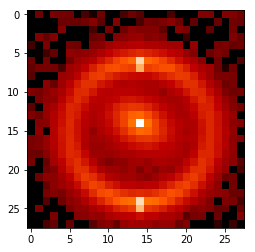

1
0.9919264300289151


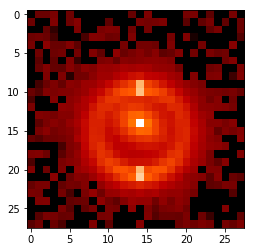

2
1.106951498447028


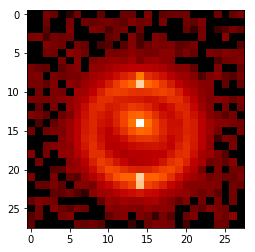

3
0.5092348066842295


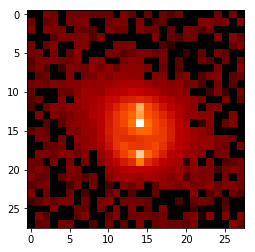

4
0.41924896484822216


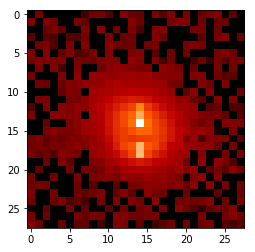

5
1.0638478725872815


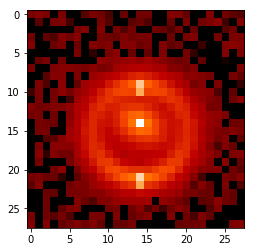

6
1.159964209568735


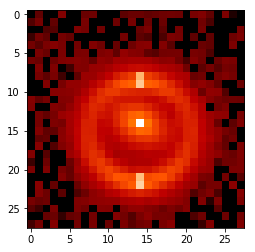

7
1.2240103900712729


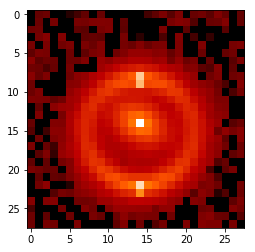

8
1.3895126580142234


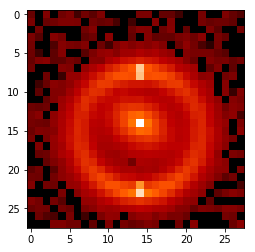

9
0.9823645734933619


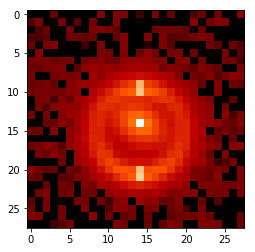

10
1.4304030669816308


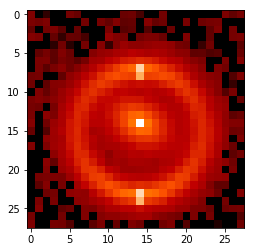

11
0.8220852292145648


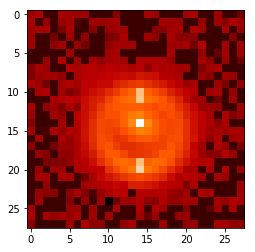

12
1.9223055437736467


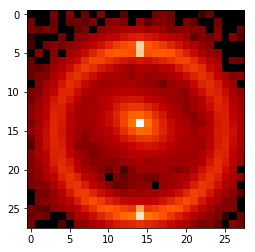

13
1.2836263032574287


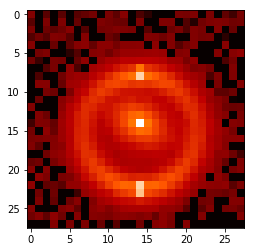

14
1.3818595902823039


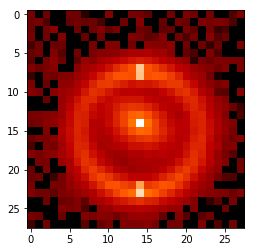

15
1.9986074206143387


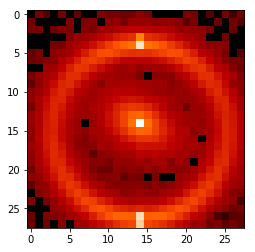

16
1.4152826506552916


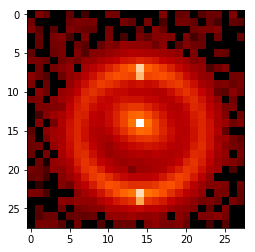

17
1.455975066917873


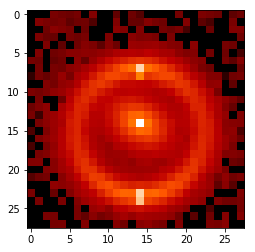

18
1.6811250501536539


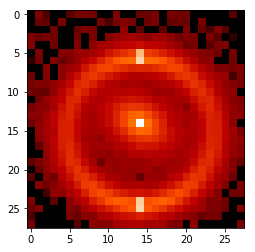

19
1.5736544221583535


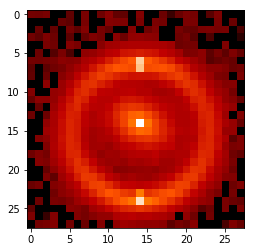

20
0.6696422167980706


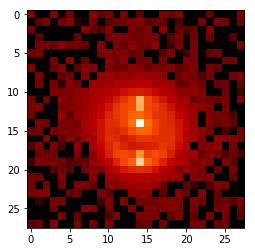

21
1.6351693610893014


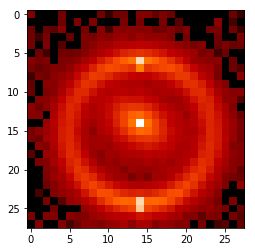

22
1.8461934966405416


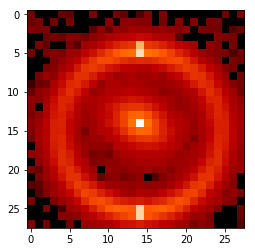

23
1.3534586917343294


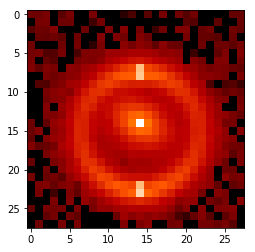

24
1.425966054186514


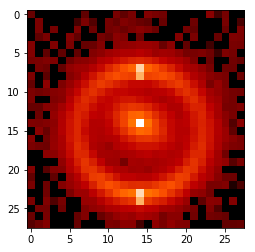

25
1.171448913955402


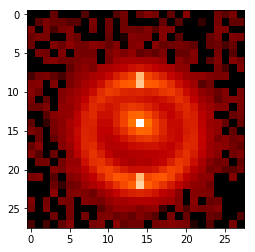

26
1.1087988194842882


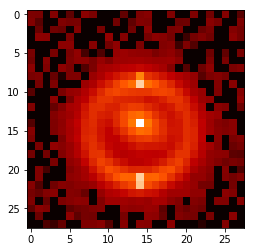

27
0.05601955423457805


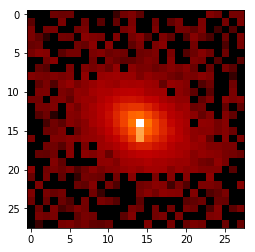

28
1.5377441962185423


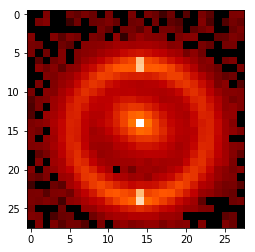

29
1.5049946113826953


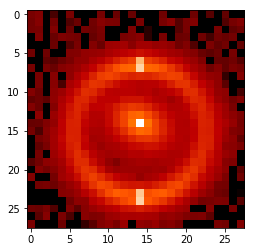

30
0.8413783565848996


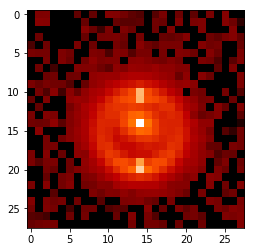

31
1.2554341021418782


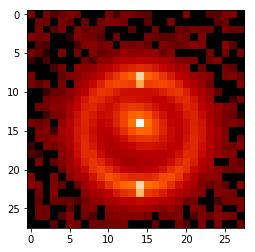

32
1.4904434489631826


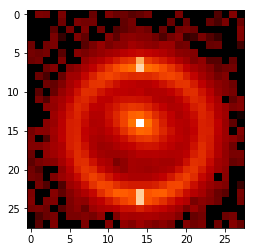

33
1.740213272445908


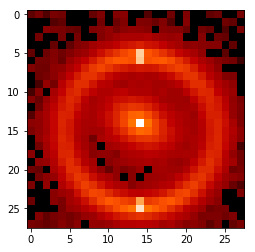

34
1.0530067779474042


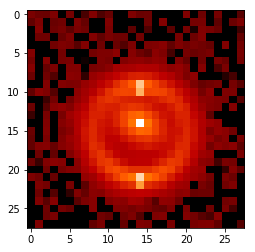

35
1.0057704673380332


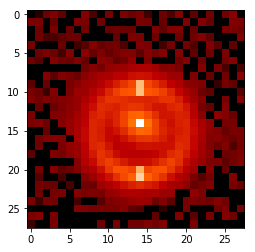

36
1.602615524957897


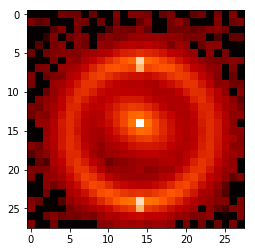

37
1.6312936105797269


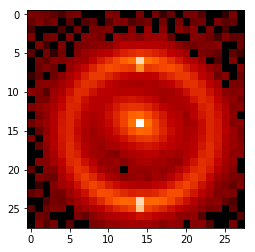

38
1.550323150018031


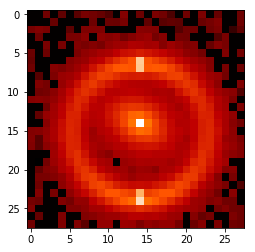

39
1.2522591361930233


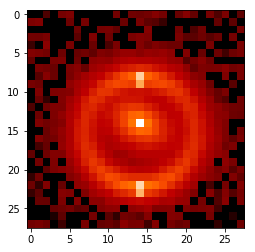

40
1.1534166755450537


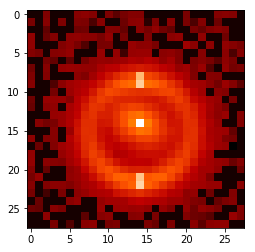

41
0.8500360963361369


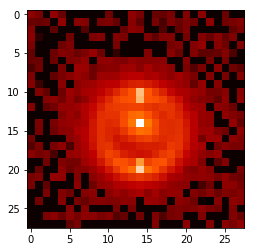

42
1.0690967745625355


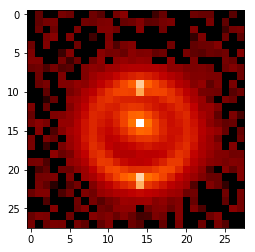

43
0.9686717449010991


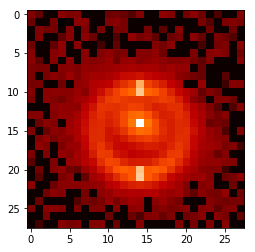

44
0.9026702652159783


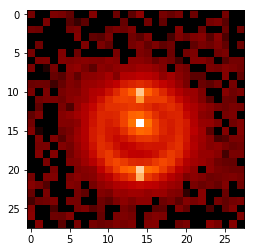

45
2.066277694422279


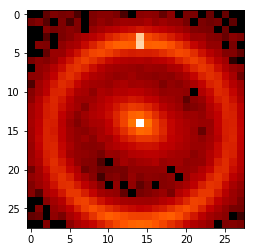

46
1.23740492473979


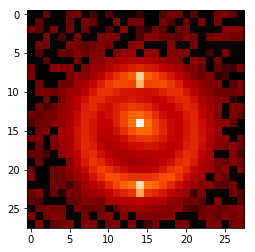

47
1.9177049581500416


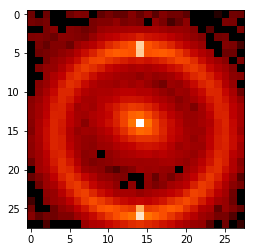

48
2.092220632308434


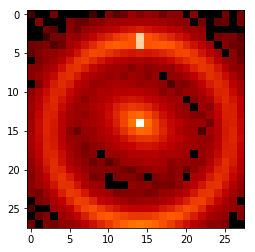

49
1.3963434657533307


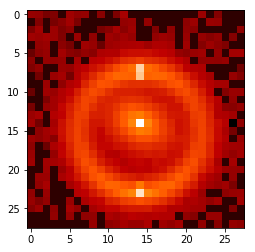

50
0.9901660547891389


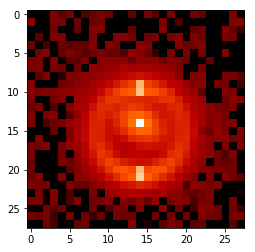

51
1.5430405842493373


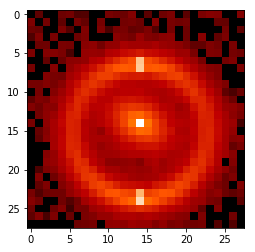

52
0.7274935534887195


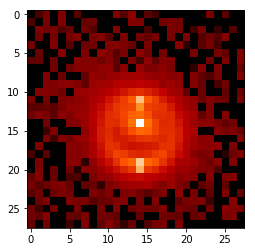

53
2.1496263889723224


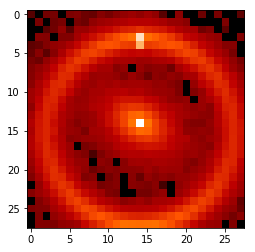

54
0.024438567840284753


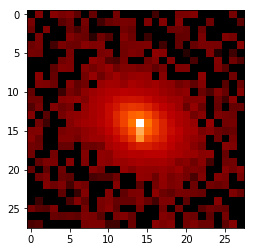

55
1.16737783750773


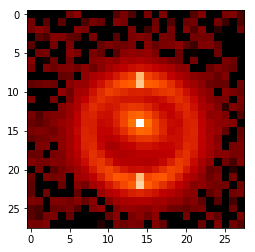

56
1.4238046281918826


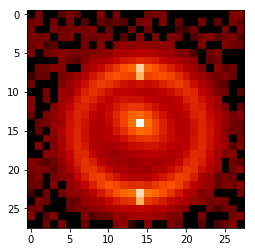

57
1.355067931168669


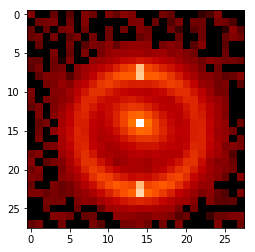

58
1.5634555678406639


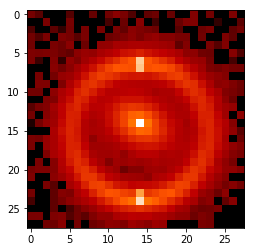

59
1.0831142047672302


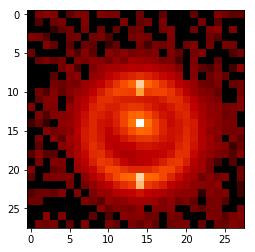

60
0.9412652974480299


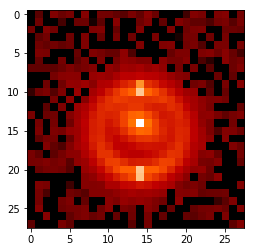

61
1.7014682338097424


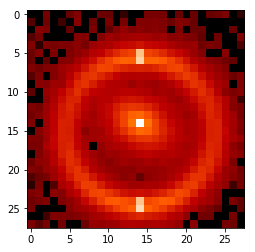

62
0.7300401926021719


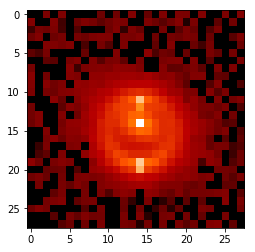

63
1.013915836999869


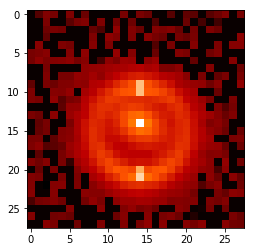

64
0.662891341943082


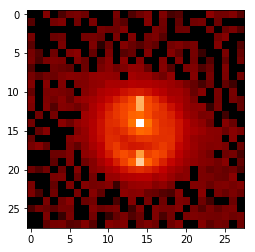

65
1.5627351166123167


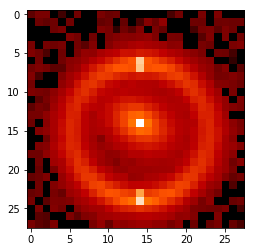

66
1.1947968406329175


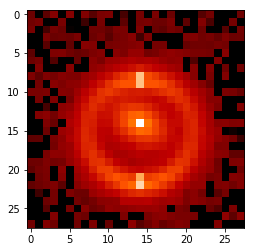

67
1.8627908907594712


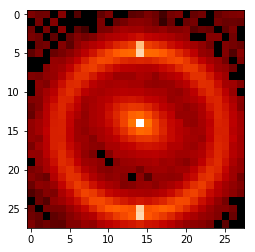

68
1.2843568618005288


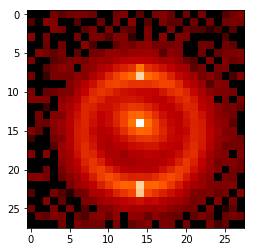

69
1.127026142779327


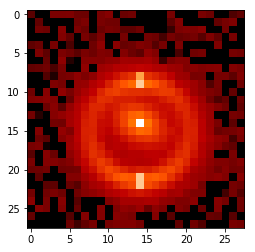

70
1.7315598619873684


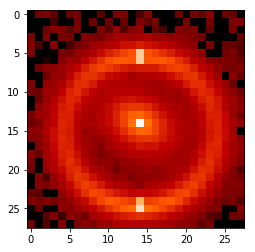

71
0.8905515534752841


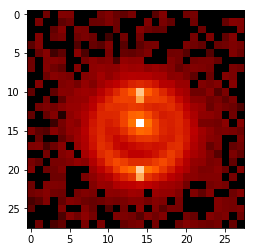

72
0.7236615676925162


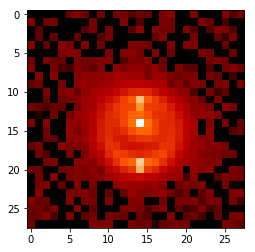

73
1.7022420417419244


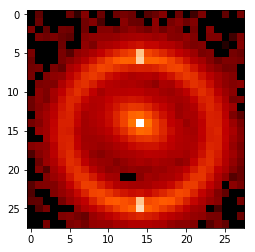

74
1.7954300336392883


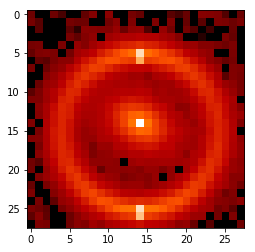

75
1.8682150928911905


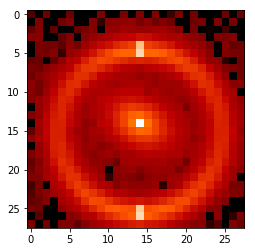

76
0.32801144399522697


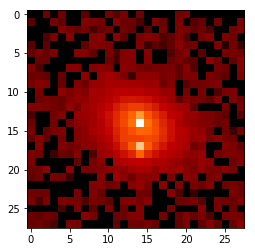

77
1.7567001688771935


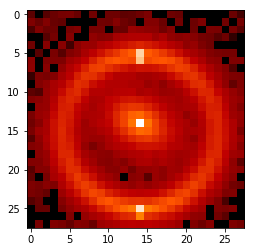

78
1.3683580708802567


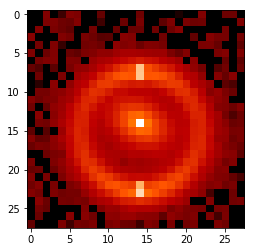

79
0.5983362799240748


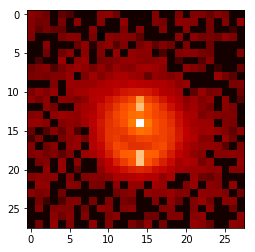

80
1.8814095025221351


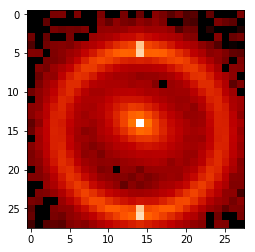

81
1.6733489494236065


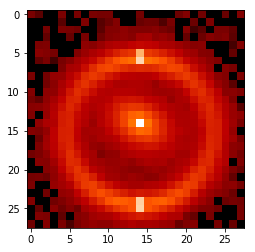

82
1.9323273782084684


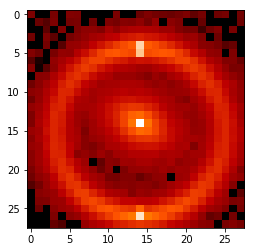

83
1.0315690914648337


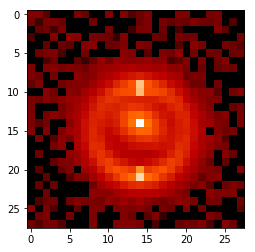

84
1.4532250660571822


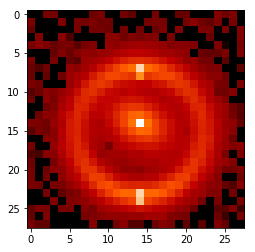

85
0.6923337448308272


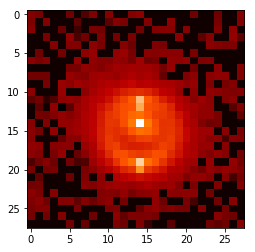

86
0.9289164104892553


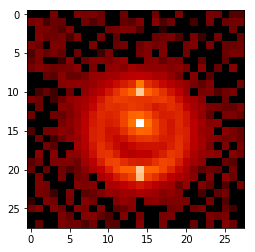

87
1.473075019928727


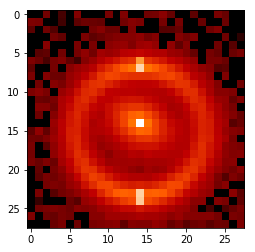

88
0.5121009175445093


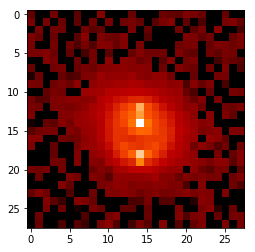

89
1.0568375137497703


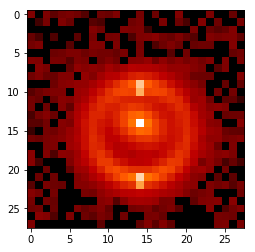

90
0.942364175001644


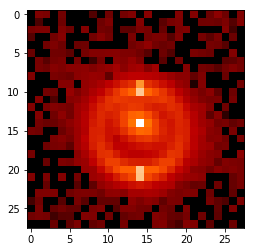

91
0.9646797518215418


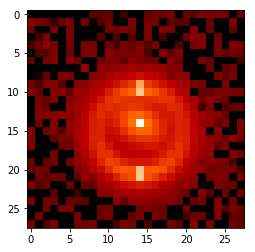

92
1.2664767898999476


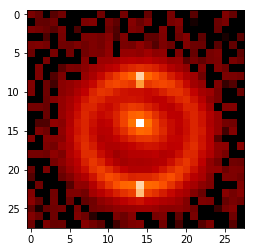

93
0.994848086810073


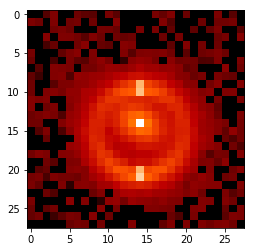

94
1.153675550939702


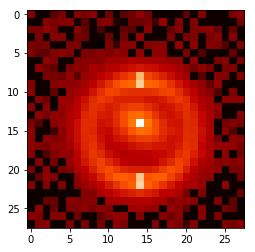

95
1.3227456920601997


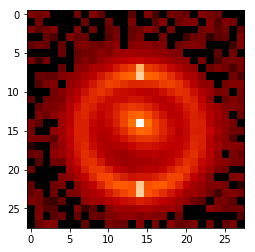

96
1.4893992103188964


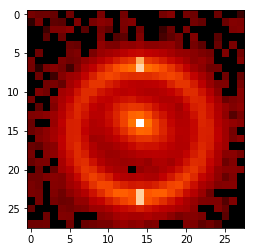

97
2.0035512194952694


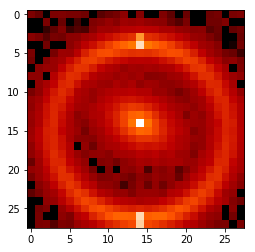

98
0.7944900263444132


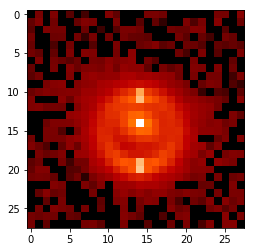

99
0.3870039572002135


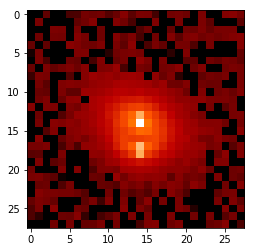

2019-10-16 13:52:53.658464


In [4]:
import datetime
firstTime = datetime.datetime.now()
print(firstTime)

rand = np.random.normal(1.25, 0.41, 100)
for i in range(100):
    print(i)
    sis_theta_E = rand[i]
    print(sis_theta_E)
    #sis_theta_E, sis_center_x, sis_center_y, theta_ra, theta_dec, q, phi, gamma, phi_gamma, redshift_list, z_source
    gen = Simlens(sis_theta_E,0,0,.9,.4,.8,.5,.1,-.5,[.5],1.5)
    out = np.log10(gen.image_gen())
    for i in range(len(out)):
      for j in range(len(out)):
        if math.isnan(out[i][j]):
          out[i][j] = -5
    plt.imshow(out, cmap='gist_heat')
    plt.show()
newTime = datetime.datetime.now()
print(newTime)